In [1]:
import yaml
import numpy as np
import matplotlib.pyplot as plt

from phonopy import load
from phonopy.units import THzToCm

def get_phonon(pbc2d=True):
    """Return a Phonopy instance with or without 2D screening."""
    with open('phonopy_hBN.yaml','r') as handle:
        nac = yaml.safe_load(handle)['nac']

    nac_params = {
        'born': nac['born_effective_charge'],
        'dielectric': nac['dielectric_constant'],
    }
    ph = load('phonopy_hBN.yaml', nac_params=nac_params, force_constants_filename='./fc_2.hdf5')
    # ph.symmetrize_force_constants()

    ph.supercell.pbc = [True,True,not pbc2d]
    ph.unitcell.pbc = [True,True,not pbc2d]
    ph.primitive.pbc = [True,True,not pbc2d]
    
    return ph

In [2]:
def get_band(q_start, q_stop, N):
    """ Return path between q_start and q_stop """
    return np.array([q_start + (q_stop-q_start)*i/(N-1) for i in range(N)])

def plot_dispersion(ax, ph, path, color):
    # get dispersion
    ph.set_band_structure(path)
    _, qnorms, freqs, _ = ph.get_band_structure()

    qnorms = np.hstack(qnorms)
    freqs = THzToCm * np.vstack(freqs)

    ax.plot(qnorms, freqs, color=color)
    ax.set_xticks([qnorms[0],qnorms[1000-1],qnorms[2000-1],qnorms[3000-1]])
    ax.set_xticklabels([r'$\Gamma$','M','K',r'$\Gamma$'])
    for q in [qnorms[0],qnorms[1000-1],qnorms[2000-1],qnorms[3000-1]]:
        # ax.vlines(q, freqs.min()-20, freqs.max()+100, color='gray', linewidth=0.75)
        ax.vlines(q, freqs.min()-100, 1700, color='gray', linewidth=0.75)
    # ax.set_ylim(freqs.min()-20, freqs.max()+100)
    ax.set_ylim(freqs.min()-100, 1700)
    ax.set_ylabel('Frequency (cm$^{-1}$)')

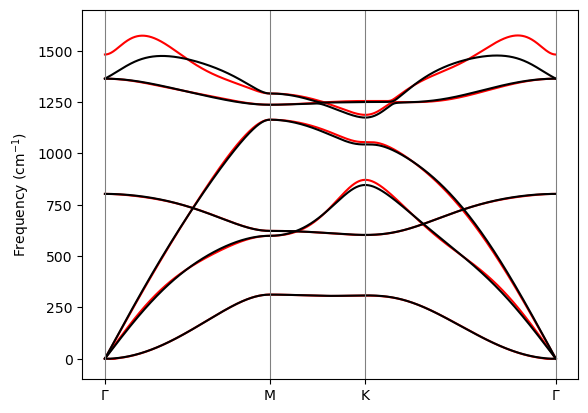

In [3]:
fig, ax = plt.subplots(1,1)
GM = get_band(np.array([0.0, 0.0, 0.0]), np.array([1/2, 0.0, 0.0]), 1000)
MK = get_band(np.array([1/2, 0.0, 0.0]), np.array([1/3, 1/3, 0.0]), 1000)
KG = get_band(np.array([1/3, 1/3, 0.0]), np.array([0.0, 0.0, 0.0]), 1000)
plot_dispersion(ax, get_phonon(False), [GM,MK,KG], color='red')
plot_dispersion(ax, get_phonon(True), [GM,MK,KG], color='black')
# ax.set_ylim([1250,1500])